<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/6%EA%B0%95_%EC%84%A0%ED%98%95%ED%8C%90%EB%B3%84%ED%95%A8%EC%88%98_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron
$
y_i=step(w_i^Tx+w_{i0}) \\
step(u) = \{
  \begin{array}{cl}
  1 & \text{if }u>0 \\
  0 & otherwise
  \end{array}
$

#퍼셉트론 이용한 이분류(Perceptron Classifier)

## 학습데이터 생성

In [1]:
import numpy as np

In [2]:
np.random.seed(50)  # 동일한 수열 발생 위해 설정
row_count = 10

In [3]:
rand_std_1 = np.random.randn(row_count, 2)
class_A = rand_std_1

In [4]:
# case 1
mean_2 = np.array([2,2])
# sigma_2 = np.array([[1,1],[1,2]])
sigma_2 = np.array([[3,1],[1,3]])   # 식별 위해 값 분포 임의 폭 증가
rand_std_2 = np.random.randn(row_count, 2)
class_B = rand_std_2 @ np.sqrt(sigma_2) + mean_2

# case 2
# import numpy.matlib
# rand_std_2 = np.random.randn(row_count, 2) + np.matlib.repmat([2.5,2.5],row_count, 1)
# class_B = rand_std_2

class_B.shape

(10, 2)

### Plot 그리기

In [5]:
import matplotlib.pyplot as plt

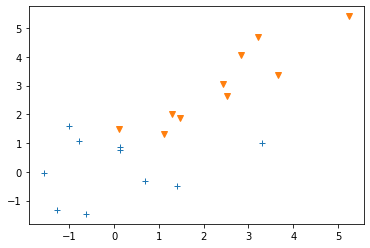

In [6]:
from matplotlib.markers import MarkerStyle
plt.plot(class_A[:,0],class_A[:,1],marker='+',linestyle='None') # 데이터 A
plt.plot(class_B[:,0],class_B[:,1],'v')  # 데이터 B


##학습 하기
$
w_i^{τ+1}=w_i^{(τ)}+η(t_i-y_i)x \\
w_{i0}^{τ+1}=w_{i0}^{(τ)}+η(t_i-y_i)x
$

In [7]:
# 입출력 차원
input_dim = 2
output_dim = 1

### 임의로 부여한 값으로 결정 경계 표시

In [8]:
# 파라미터 초기화
weight=np.random.rand(input_dim,1)*0.4-0.2
weight0=np.random.rand(1)*0.4-0.2
weight, weight0
# np.info(weight)

(array([[ 0.16652338],
        [-0.0449156 ]]), array([-0.08202818]))

In [9]:
# merge data
train_data = np.vstack([class_A,class_B])

# 선형 그리기 위한 데이터 생성
train_dataX_min, train_dataX_max = np.min(train_data[:,0],0), np.max(train_data[:,0],0)
import math
math.floor(train_dataX_min), math.ceil(train_dataX_max), 

(-2, 6)

In [10]:
x_values = np.arange(math.floor(train_dataX_min), math.ceil(train_dataX_max))
x_values, np.info(x_values)

class:  ndarray
shape:  (8,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x56067cc1d4c0
byteorder:  little
byteswap:  False
type: int64


(array([-2, -1,  0,  1,  2,  3,  4,  5]), None)

In [11]:
x_values, weight, ((weight[0,0]*x_values-weight0)/weight[1,0])

(array([-2, -1,  0,  1,  2,  3,  4,  5]), array([[ 0.16652338],
        [-0.0449156 ]]), array([  5.58867217,   1.88119925,  -1.82627366,  -5.53374657,
         -9.24121949, -12.9486924 , -16.65616532, -20.36363823]))

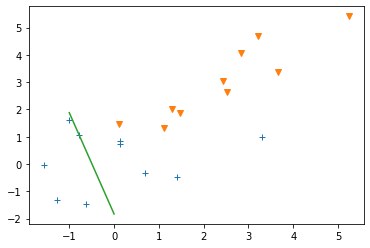

In [12]:
plt.plot(class_A[:,0],class_A[:,1],marker='+',linestyle='None') # 데이터 A
plt.plot(class_B[:,0],class_B[:,1],'v')  # 데이터 B
# x_values가 커서 [1:3] 제한 출력
plt.plot(x_values[1:3], ((weight[0,0]*x_values-weight0)/weight[1,0])[1:3]) 
plt.show()

### 학습 통한 결정 경계 

In [13]:
# class별 label 생성. class_A - 0, class_B - 1
class_A_label = np.full((row_count,1), fill_value=0)
class_B_label = np.full((row_count,1), fill_value=1)
class_A_label.shape, class_B_label.shape
train_label = np.vstack([class_A_label, class_B_label])
train_label[row_count-3:row_count+3], np.info(train_label)

class:  ndarray
shape:  (20, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x56067cb5ab40
byteorder:  little
byteswap:  False
type: int64


(array([[0],
        [0],
        [0],
        [1],
        [1],
        [1]]), None)

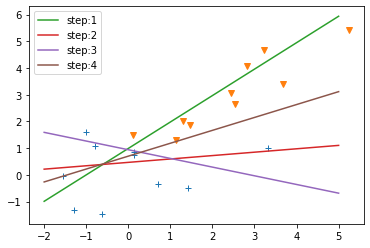

In [14]:
# 학습 횟수
steps = 5
eta = 0.5
plt.plot(class_A[:,0],class_A[:,1],marker='+',linestyle='None') # 데이터 A
plt.plot(class_B[:,0],class_B[:,1],'v')  # 데이터 B

for j in range(1, steps):
  # errors = np.empty([0,1])
  for i in range(row_count*2):
    x_value, y_label = train_data[i,:], train_label[i,0]
    # 퍼셉트론 계산
    result = x_value @ weight + weight0
    if (result > 0) :
      y_hat=1
    else :
      y_hat=0
    error = y_label - y_hat
    # errors = np.append(errors,error)
    delta_weight = np.reshape(eta * error * x_value.T, (2,1))
    delta_weight0 = eta * error * 1
    weight = weight + delta_weight
    weight0 = weight0 + delta_weight0
  # x_values가 커서 제한 출력
  plt.plot(x_values, ((weight[0,0]*x_values-weight0)/weight[1,0]), label='step:{}'.format(j))
plt.legend()
plt.show()
